* `Importing the libraries`

In [46]:
## Major
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import re
import string
from tqdm import tqdm
import joblib
import os
import seaborn as sns
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## sklearn -- for processing and models
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
## Optimization Algorithm using Jaya Optimizer
from mealpy.swarm_based.JA import OriginalJA, LevyJA

## SMOTE for imblanced dataset
from imblearn.over_sampling import SMOTE

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec, FastText
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

* `Reading data`

In [5]:
FILEPATH = os.path.join(os.getcwd(), '..', 'data', 'twitter-sanders-apple3.csv')
df = pd.read_csv(FILEPATH)
df.head()

,class,text
0,Pos,Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
1,Pos,@Apple will be adding more carrier support to the iPhone 4S (just announced)
2,Pos,Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY
3,Pos,@RIM you made it too easy for me to switch to @Apple iPhone. See ya!
4,Pos,I just realized that the reason I got into twitter was ios5 thanks @apple


* `EDA`

In [6]:
df.shape

(988, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   988 non-null    object
 1   text    988 non-null    object
dtypes: object(2)
memory usage: 15.6+ KB


In [8]:
df['class'].value_counts()

class
Neutral    509
Neg        316
Pos        163
Name: count, dtype: int64

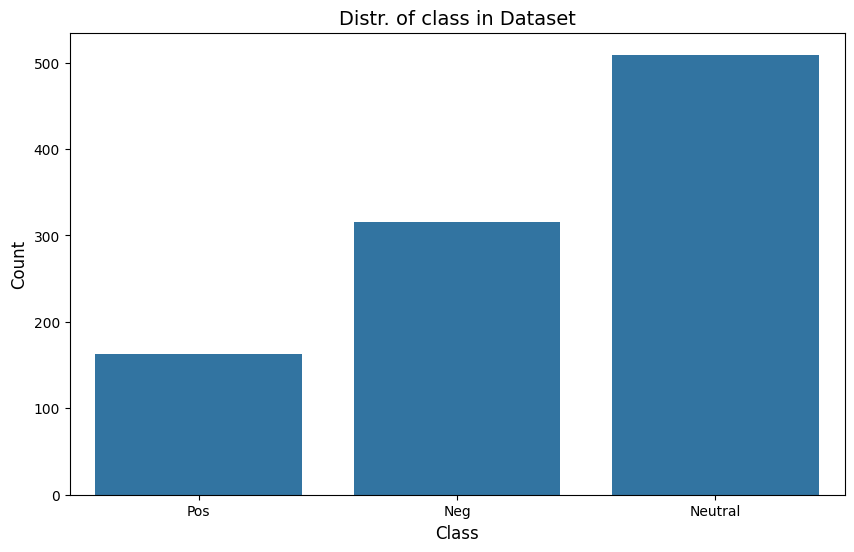

In [9]:
## countplot of target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class')
plt.title('Distr. of class in Dataset', fontsize=14, c='k')
plt.xlabel('Class', c='k', fontsize=12)
plt.ylabel('Count', c='k', fontsize=12)
plt.show()

---

* `Text Cleaning & Viz`

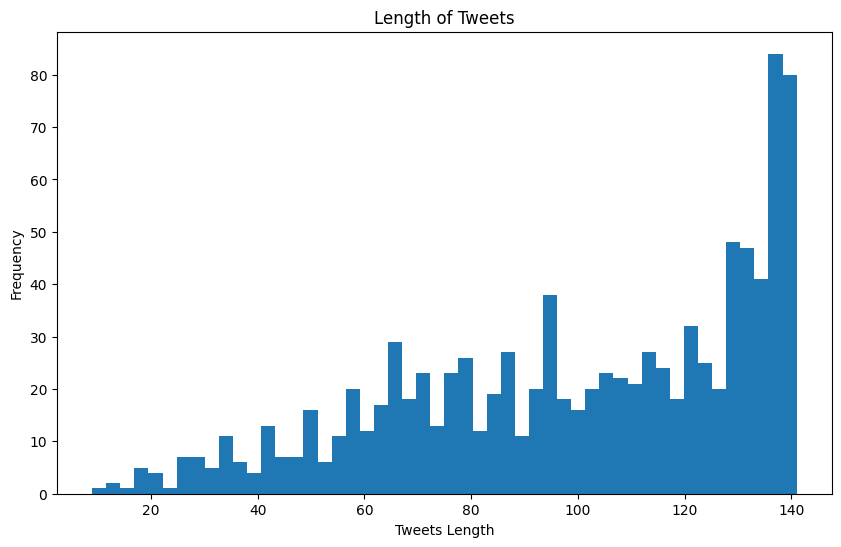

In [10]:
length_tweets = df['text'].str.len()
## Plotting
plt.figure(figsize=(10, 6))
plt.hist(length_tweets, bins=50)
plt.title('Length of Tweets')
plt.xlabel('Tweets Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Hashtags
def hashtag_extract(x):
    hashtags = []
    ## Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

# Extracting hashtags for each class
hash_neg = hashtag_extract(df[df['class']=='Neg']['text'])  # Negative Hashtags
hash_neu = hashtag_extract(df[df['class']=='Neutral']['text'])  # Neutral Hashtags
hash_pos = hashtag_extract(df[df['class']=='Pos']['text'])  # Positive Hashtags

# Unnesting the lists
hash_neg = sum(hash_neg, [])
hash_pos = sum(hash_pos, [])
hash_neu = sum(hash_neu, [])

hash_neg

['iOS5',
 'iTunesMatch',
 'Siri',
 'fail',
 'fb',
 'iphone',
 'ripstevejobs',
 'thenonsensepersists',
 'neednewipadguide',
 'fatfuckingchance',
 'wifi',
 'bug',
 'destroying',
 'productivity',
 'frustrated',
 'iOS5',
 'whaddupwitdat',
 'custserv',
 'now',
 'iPad',
 'iOS5',
 'AT',
 'apple',
 'iphone',
 '4S',
 'fail',
 'iOS5',
 'expensivepaperweight',
 'DontBeMadAtMeBecause',
 'Android',
 'apple',
 'mouse',
 'buttery',
 'happy',
 'macworld',
 'iPhone4',
 'fuckingpissed',
 'fail',
 'iOS',
 'andshuttingdownru',
 'andshuttingdownrunningprograms',
 'nohelp',
 'icloud',
 'dropbox',
 'Newton',
 'iCloud',
 'iOS5',
 'iOS5atemydingo',
 'iphone4s',
 'crankywithnophone',
 'iphone',
 'help',
 'Siri',
 'ugh',
 'iOS5',
 '3GS',
 'needsomethingtoread',
 'iPhone',
 'iOS5',
 'useless',
 'nopatience',
 'iOS5',
 'FAIL',
 'ios5downgrade',
 'timewarnercable',
 'iCloud',
 'OSX',
 'iOS5',
 'fail',
 'Siri',
 'Siri',
 'Siri',
 'Siri',
 'iphone',
 'ipod',
 'Siri',
 'iPhone4s',
 'Fail',
 'iphone',
 'annoyed',
 'iCl

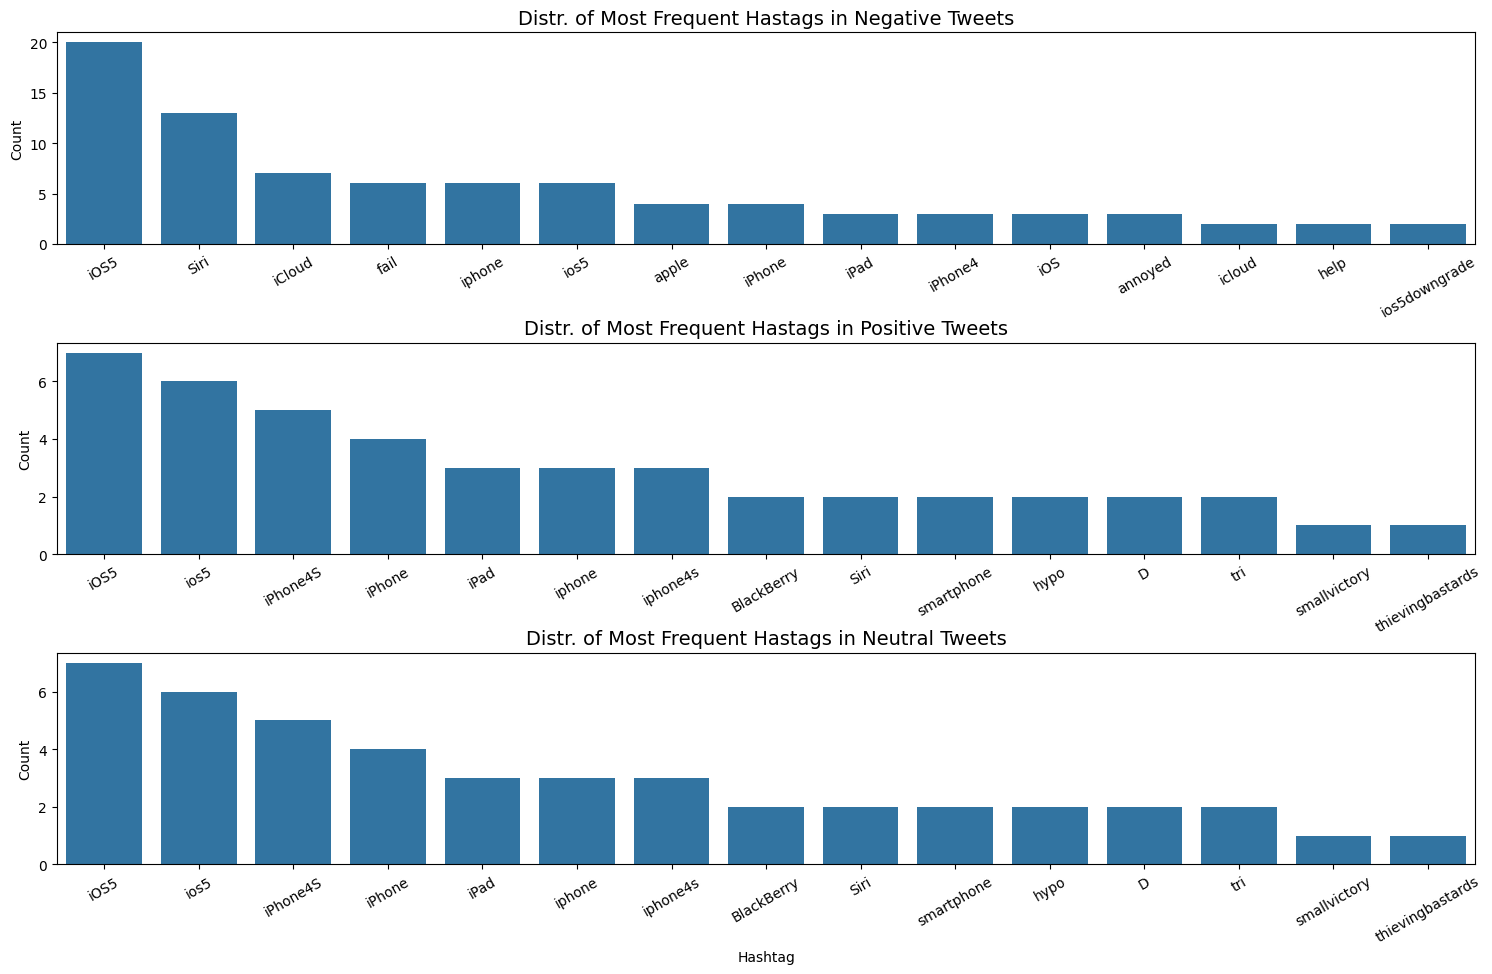

In [12]:
a_neg = nltk.FreqDist(hash_neg)
a_neu = nltk.FreqDist(hash_neu)
a_pos = nltk.FreqDist(hash_pos)

## Negative Tweets
df_neg = pd.DataFrame({'Hashtag': list(a_neg.keys()),
                'Count': list(a_neg.values())})

## Positive Tweets
df_pos = pd.DataFrame({'Hashtag': list(a_pos.keys()),
                'Count': list(a_pos.values())})

## Neutral Tweets
df_neu = pd.DataFrame({'Hashtag': list(a_neu.keys()),
                'Count': list(a_neu.values())})

# selecting top 15 most frequent hashtags     
df_neg = df_neg.nlargest(columns='Count', n=15) 
df_pos = df_pos.nlargest(columns='Count', n=15) 
df_neu = df_pos.nlargest(columns='Count', n=15)


## Plotting
fig, ax = plt.subplots(3, 1, figsize=(16, 10))
fig.tight_layout(pad=5)
plt.sca(ax[0])
sns.barplot(data=df_neg, x='Hashtag', y='Count')
plt.xticks(rotation=30)
plt.title('Distr. of Most Frequent Hastags in Negative Tweets', fontsize=14, c='k')
plt.xlabel('')
##
plt.sca(ax[1])
sns.barplot(data=df_pos, x='Hashtag', y='Count')
plt.xticks(rotation=30)
plt.title('Distr. of Most Frequent Hastags in Positive Tweets', fontsize=14, c='k')
plt.xlabel('')
##
plt.sca(ax[2])
sns.barplot(data=df_neu, x='Hashtag', y='Count')
plt.xticks(rotation=30)
plt.title('Distr. of Most Frequent Hastags in Neutral Tweets', fontsize=14, c='k')
plt.show()

In [13]:
## Remove unwanted text patterns from the tweets
def remove_pattern(input_txt: str, pattern: str):
    ''' This Function takes the input and pattern you want to remove

    Args:
    *****
        (input_text: str) --> The text you want to apply the function to it.
        (pattern: str) --> The pattern you want to remove from the text.
    '''
    input_txt = re.sub(pattern, '', input_txt)
    return input_txt

* `Remove Tags`

In [14]:
## Removing @user in tweets, and apply the function
# df['text'] = df['text'].apply(lambda x: remove_pattern(x, pattern=r'@[\w]*')) # same meaning
df['text'] = df['text'].apply(remove_pattern, pattern=r'@[\w]*')
df.head()

,class,text
0,Pos,Now all has to do is get swype on the iphone and it will be crack. Iphone that is
1,Pos,will be adding more carrier support to the iPhone 4S (just announced)
2,Pos,Hilarious video - guy does a duet with 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY
3,Pos,you made it too easy for me to switch to iPhone. See ya!
4,Pos,I just realized that the reason I got into twitter was ios5 thanks


* `remove Hyperlinks`

In [15]:
## An exmaple before removing links
df['text'].iloc[2]

"Hilarious  video - guy does a duet with  's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY"

In [16]:
## Define a regular expression pattern to match URLs
## Apply the above function
df['text'] = df['text'].apply(remove_pattern, pattern=r'https?://\S+|www\.\S+')
df.head()

,class,text
0,Pos,Now all has to do is get swype on the iphone and it will be crack. Iphone that is
1,Pos,will be adding more carrier support to the iPhone 4S (just announced)
2,Pos,Hilarious video - guy does a duet with 's Siri. Pretty much sums up the love affair!
3,Pos,you made it too easy for me to switch to iPhone. See ya!
4,Pos,I just realized that the reason I got into twitter was ios5 thanks


In [17]:
## An exmaple After removing links
df['text'].iloc[2]

"Hilarious  video - guy does a duet with  's Siri. Pretty much sums up the love affair! "

* `remove repeated charchters`

In [18]:
## An exmaple before removing repeated chars
df['text'].iloc[210]

'RT : Oh just fuck you . Already?? ---&gt;  iPhone 5 on schedule for summer launch?  via '

In [19]:
def remove_excessive_repeated_characters(input_string, max_repeats=2):
    """A Function to remove excessive repeated chars while preserving correct words"""
    # Define a regular expression pattern to match consecutive repeated characters
    pattern = f"(\\w)\\1{{{max_repeats},}}"
    # Replace the matched pattern with a single occurrence of the character
    cleaned_string = re.sub(pattern, r"\1", input_string)
    
    return cleaned_string

In [20]:
## Apply the above function
df['text'] = df['text'].apply(remove_excessive_repeated_characters)
df.head()

,class,text
0,Pos,Now all has to do is get swype on the iphone and it will be crack. Iphone that is
1,Pos,will be adding more carrier support to the iPhone 4S (just announced)
2,Pos,Hilarious video - guy does a duet with 's Siri. Pretty much sums up the love affair!
3,Pos,you made it too easy for me to switch to iPhone. See ya!
4,Pos,I just realized that the reason I got into twitter was ios5 thanks


In [21]:
## An exmaple After removing repeated chars
df['text'].iloc[210]

'RT : Oh just fuck you . Already?? ---&gt;  iPhone 5 on schedule for summer launch?  via '

* `Emotions Mapping`

In [22]:
## Check on sample before mapping emotions
df['text'].iloc[34]

'At the bus with my iPhone ;) thxx '

In [23]:
## Convert Emojis to Text : example 😀 to Happy , 😢 Sad
## This Dataset doesn't contains emojis, but it contains emotioncons like that :D, :)
## So, We can't demojize, but we will map the moticons to its meaning.

emotion_meanings = {
    ":)": "Happy",
    ":(": "Sad",
    ":D": "Very Happy",
    ":|": "Neutral",
    ":O": "Surprised",
    "<3": "Love",
    ";)": "Wink",
    ":P": "Playful",
    ":/": "Confused",
    ":*": "Kiss",
    ":')": "Touched",
    "XD": "Laughing",
    ":3": "Cute",
    ">:(": "Angry",
    ":-O": "Shocked",
    ":|]": "Robot",
    ":>": "Sly",
    "^_^": "Happy",
    "O_o": "Confused",
    ":-|": "Straight Face",
    ":X": "Silent",
    "B-)": "Cool",
    "<(‘.'<)": "Dance",
    "(-_-)": "Bored",
    "(>_<)": "Upset",
    "(¬‿¬)": "Sarcastic",
    "(o_o)": "Surprised",
    "(o.O)": "Shocked",
    ":0": "Shocked",
    ":*(": "Crying",
    ":v": "Pac-Man",
    "(^_^)v": "Double Victory",
    ":-D": "Big Grin",
    ":-*": "Blowing a Kiss",
    ":^)": "Nosey",
    ":-((": "Very Sad",
    ":-(": "Frowning",
}


## Function to replace emotions with their meanings
def convert_emotions(text: str):
    ''' This Function is to replace the emotions with thier meaning instead 
    '''
    for emotion, meaning in emotion_meanings.items():
        text = text.replace(emotion, meaning)
    return text

## Apply the function on our dataset
df['text'] = df['text'].apply(convert_emotions)
df.head()

,class,text
0,Pos,Now all has to do is get swype on the iphone and it will be crack. Iphone that is
1,Pos,will be adding more carrier support to the iPhone 4S (just announced)
2,Pos,Hilarious video - guy does a duet with 's Siri. Pretty much sums up the love affair!
3,Pos,you made it too easy for me to switch to iPhone. See ya!
4,Pos,I just realized that the reason I got into twitter was ios5 thanks


In [24]:
## Check on sample After mapping emotions
df['text'].iloc[34]

'At the bus with my iPhone Wink thxx '

* `Removing Punctuations, Numbers and special chars`

In [25]:
## Removing Punctuations, Numbers, and Special Characters
df['text'] = df['text'].str.replace('[^a-zA-Z#]', ' ')
df.head()

,class,text
0,Pos,Now all has to do is get swype on the iphone and it will be crack. Iphone that is
1,Pos,will be adding more carrier support to the iPhone 4S (just announced)
2,Pos,Hilarious video - guy does a duet with 's Siri. Pretty much sums up the love affair!
3,Pos,you made it too easy for me to switch to iPhone. See ya!
4,Pos,I just realized that the reason I got into twitter was ios5 thanks


* `Removing short words`

In [26]:
## Removing Short Words
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if (len(w)>3)]))
df.head()

,class,text
0,Pos,swype iphone will crack. Iphone that
1,Pos,will adding more carrier support iPhone (just announced)
2,Pos,Hilarious video does duet with Siri. Pretty much sums love affair!
3,Pos,made easy switch iPhone.
4,Pos,just realized that reason into twitter ios5 thanks


* `Remove Numbers from Words`

In [27]:
## Call the above function (remove_pattern), We want to remove the numbers from words 
## We don't remove all numbers on the dataset, The pattern only removes the numbers within the words
df['text'] = np.vectorize(remove_pattern)(input_txt=df['text'], pattern='(?<=\w)\d+|\d+(?=\w)')
df.head()

,class,text
0,Pos,swype iphone will crack. Iphone that
1,Pos,will adding more carrier support iPhone (just announced)
2,Pos,Hilarious video does duet with Siri. Pretty much sums love affair!
3,Pos,made easy switch iPhone.
4,Pos,just realized that reason into twitter ios thanks


* `Remove Special Chars`

In [28]:
## An exmaple before removing special chars
df['text'].iloc[2]

'Hilarious video does duet with Siri. Pretty much sums love affair!'

In [29]:
## Define a regular expression pattern to match special characters
## Apply the function to the dataset
df['text'] = df['text'].apply(remove_pattern, pattern=r'[!@#$%^&*()_+{}\[\]:;<>,.?~\\|\/]')
df.head()

,class,text
0,Pos,swype iphone will crack Iphone that
1,Pos,will adding more carrier support iPhone just announced
2,Pos,Hilarious video does duet with Siri Pretty much sums love affair
3,Pos,made easy switch iPhone
4,Pos,just realized that reason into twitter ios thanks


In [30]:
## An exmaple After removing special chars
df['text'].iloc[2]

'Hilarious video does duet with Siri Pretty much sums love affair'

* `Rmeove Redundant words`

In [31]:
## An exmaple before solving that
df['text'].iloc[400]

"Dear convenienthandythoughtfulsmart that after iPhone ios update you're apps won't work anymore none grmbl"

In [32]:
## A Function to remove redundant words like (I've, You'll)
## Again, It is challenging
import nltk
nltk.download('stopwords')

def remove_redundant_words_extra_spaces(text: str):
    ## Remove contractions using regular expressions
    contraction_pattern = re.compile(r"'\w+|\w+'\w+|\w+'")
    text = contraction_pattern.sub('', text)

    ## Define a set of stopwords
    stop_words = set(stopwords.words("english"))

    ## Remove stopwords and extra spaces
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    clean_text = ' '.join(filtered_words)

    ## Remove extra spaces
    clean_text = ' '.join(clean_text.split())
    
    return clean_text


## Apply the above function
df['text'] = df['text'].apply(remove_redundant_words_extra_spaces)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YUSSEF/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
## An exmaple before solving that
df['text'].iloc[400]

'Dear convenienthandythoughtfulsmart iPhone ios update apps work anymore none grmbl'

* `Tokenization`

In [34]:
## Tokenization
tokenized_tweet = df['text'].apply(lambda x: x.split()) 
tokenized_tweet.head()

0                                      [swype, iphone, crack, Iphone]
1                       [adding, carrier, support, iPhone, announced]
2    [Hilarious, video, duet, Siri, Pretty, much, sums, love, affair]
3                                        [made, easy, switch, iPhone]
4                            [realized, reason, twitter, ios, thanks]
Name: text, dtype: object

In [35]:
# import nltk
# nltk.download('wordnet')

## Lemmatization
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # lemmatizer
tokenized_tweet.head()

0                                     [swype, iphone, crack, Iphone]
1                      [adding, carrier, support, iPhone, announced]
2    [Hilarious, video, duet, Siri, Pretty, much, sum, love, affair]
3                                       [made, easy, switch, iPhone]
4                            [realized, reason, twitter, io, thanks]
Name: text, dtype: object

In [36]:
## Join words again and append it to (dataset DF)
tokenized_tweett = tokenized_tweet
for i in range(len(tokenized_tweett)):
    tokenized_tweett[i] = ' '.join(tokenized_tweett[i])
    
df['text'] = tokenized_tweett
df.head()

,class,text
0,Pos,swype iphone crack Iphone
1,Pos,adding carrier support iPhone announced
2,Pos,Hilarious video duet Siri Pretty much sum love affair
3,Pos,made easy switch iPhone
4,Pos,realized reason twitter io thanks


* `Some Viz`

In [37]:
' '.join(df[df['class']=='Pos']['text'].astype(str))

'swype iphone crack Iphone adding carrier support iPhone announced Hilarious video duet Siri Pretty much sum love affair made easy switch iPhone realized reason twitter io thanks current user little disappointed move strangest thing Siri said far glad gave Siri sense humor Great close personal event tonight Regent store company experience best customer service aside apply hope call Lmao think onto something magical DYING haha Siri suggested find whore Lmao think onto something magical DYING haha Siri suggested find whore hide body lolol registered developer hoping actually help greatly appreciated Wow Great deal refurbed iPad first gen model Apple offer great deal refurbished st-gen iPads registered developer hoping actually help greatly appreciated Currently learning Mandarin upcoming trip Hong Kong gotta hand iPhones uber useful flashcard apps Come dark side send free iPhone publicly ceremoniously burn BlackBerry send free iPhone version publicly ceremoniously burn BlackBerry Thank F

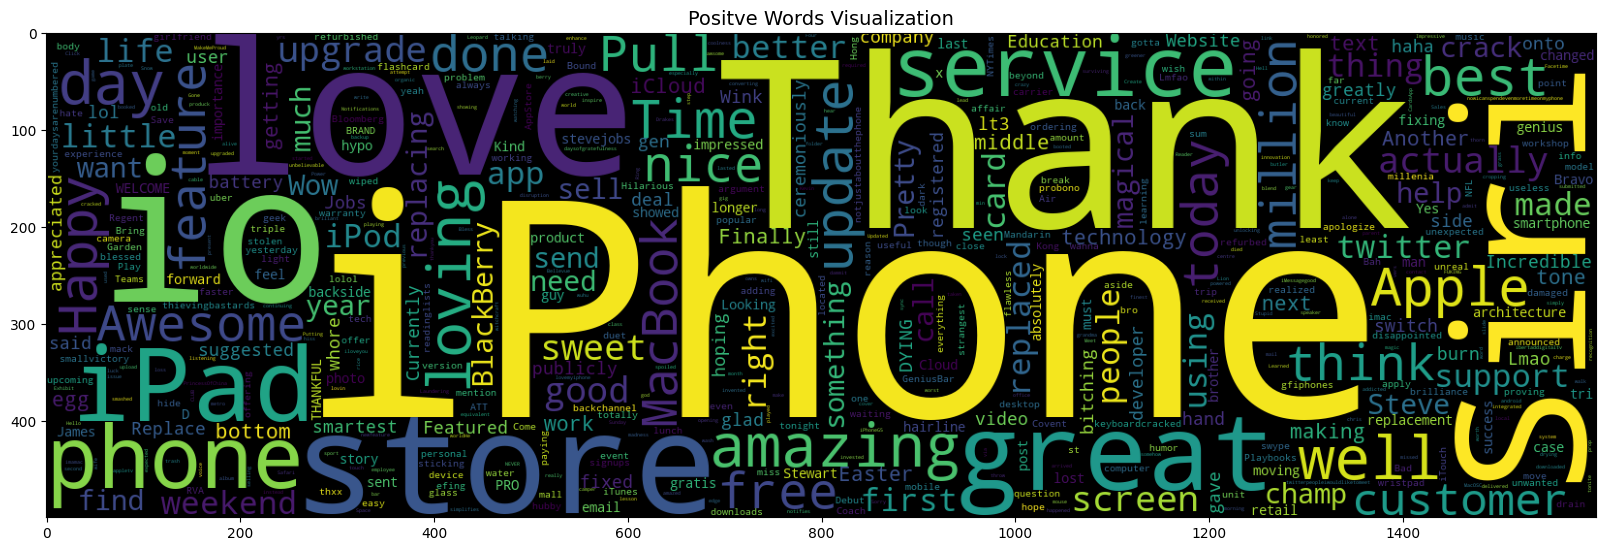

In [38]:
## For Positive Words
plt.figure(figsize=(20, 8))
wc = WordCloud(max_words=10000, width=1600, height=500, 
            collocations=False).generate(" ".join(df[df['class']=='Pos']['text'].astype(str)))
plt.title('Positve Words Visualization', fontsize=14, c='k')
plt.imshow(wc)
plt.show()

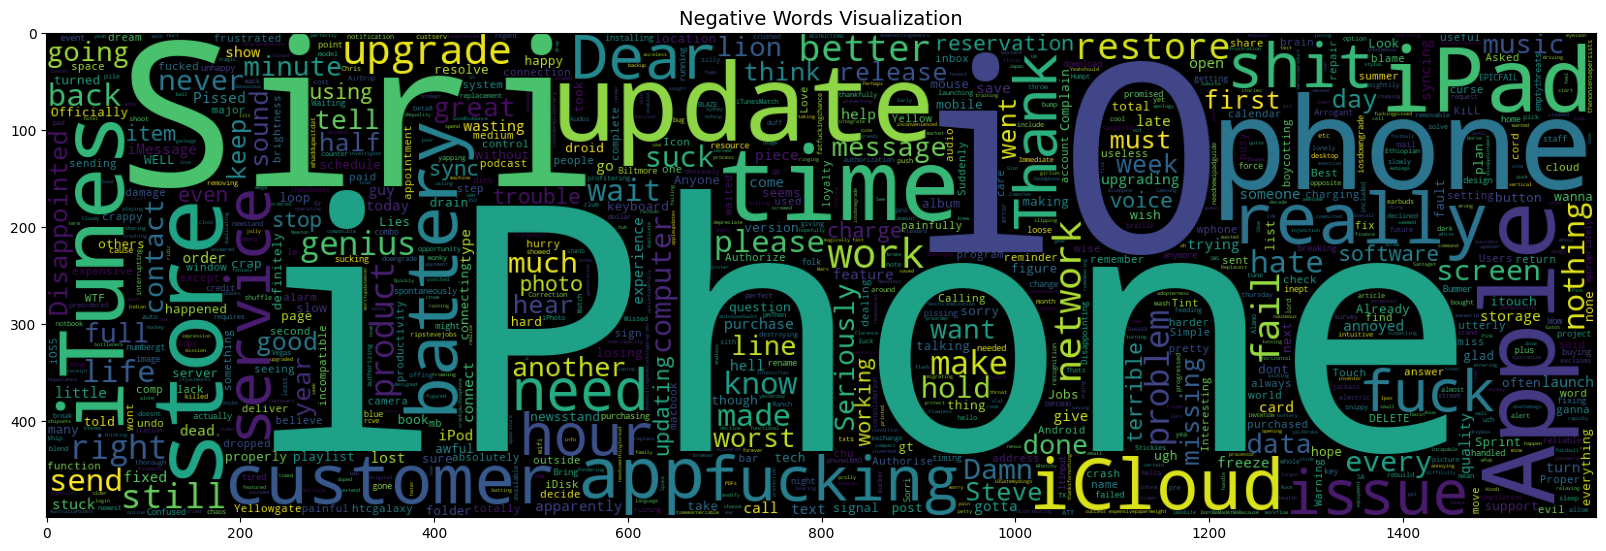

In [39]:
## For Negative Words
plt.figure(figsize=(20, 8))
wc = WordCloud(max_words=10000, width=1600, height=500, 
            collocations=False).generate(" ".join(df[df['class']=='Neg']['text'].astype(str)))
plt.title('Negative Words Visualization', fontsize=14, c='k')
plt.imshow(wc)
plt.show()

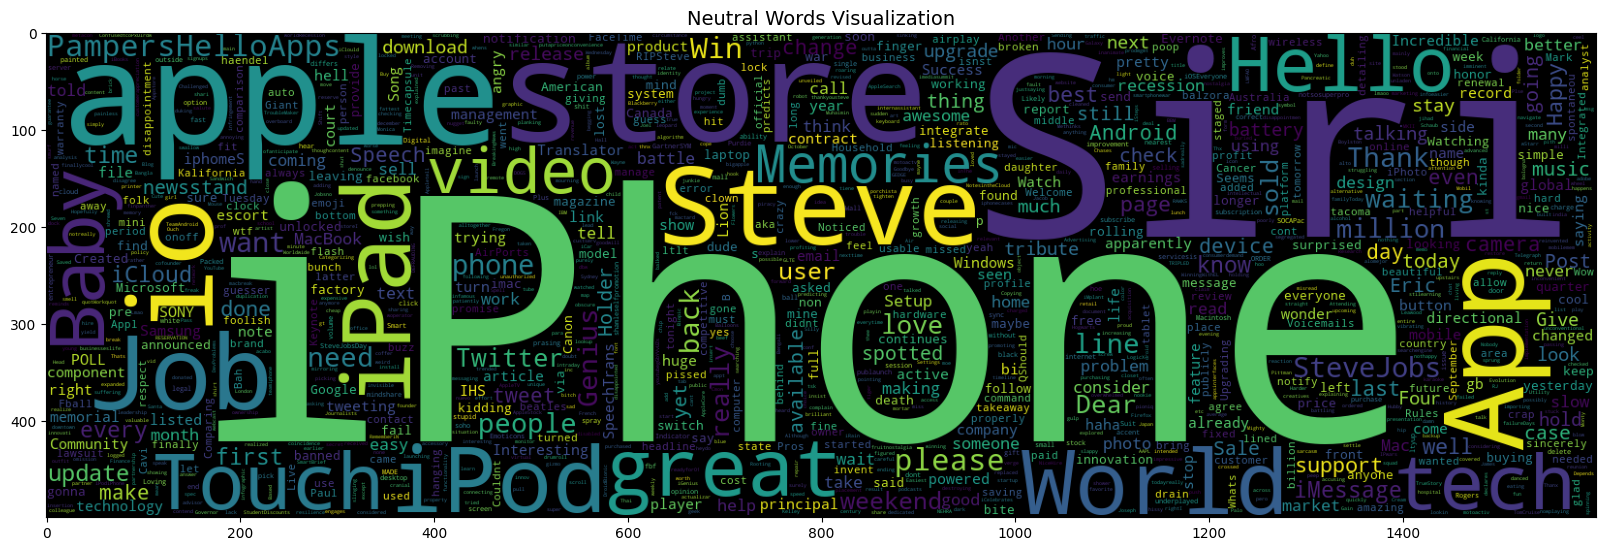

In [40]:
## For Neutral Words
plt.figure(figsize=(20, 8))
wc = WordCloud(max_words=10000, width=1600, height=500, 
            collocations=False).generate(" ".join(df[df['class']=='Neutral']['text'].astype(str)))
plt.title('Neutral Words Visualization', fontsize=14, c='k')
plt.imshow(wc)
plt.show()

* `Vectorization`

* `1- BOW`

In [120]:
## Extracting Features from Cleaned Tweets using BOW 
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=None, stop_words='english')
X_bow = bow_vectorizer.fit_transform(df['text'])
X_bow = X_bow.toarray()
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [121]:
# Dump the pipeline locally in ARTIFACTS_FOLDER_PATH
ARTIFACTS_FOLDER_PATH = os.path.join(os.getcwd(), '..', 'artifacts')
os.makedirs(ARTIFACTS_FOLDER_PATH, exist_ok=True)

In [40]:
# Dump the pipeline locally --> Serialzation
joblib.dump(bow_vectorizer, os.path.join(ARTIFACTS_FOLDER_PATH, 'bow_vectorizer.pkl'))

['c:\\Users\\YUSSEF\\OneDrive\\Desktop\\Projects\\Twitter_Sentiment_Analysis\\notebooks\\..\\artifacts\\bow_vectorizer.pkl']

`2. TF-IDF`

In [134]:
## Extracting Features from Cleaned Tweets using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=None, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])
X_tfidf = X_tfidf.toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [135]:
joblib.dump(tfidf_vectorizer, os.path.join(ARTIFACTS_FOLDER_PATH, 'tfidf_vectorizer.pkl'))

['c:\\Users\\YUSSEF\\OneDrive\\Desktop\\Projects\\Twitter_Sentiment_Analysis\\notebooks\\..\\artifacts\\tfidf_vectorizer.pkl']

`3 - Word2Vec Model (CBOW & Skip-Gram)`

In [126]:
def preprocess_text(doc: str):
    """ Function for tokenizing for Word2Vec Model"""
    
    # Tokenizing
    tokens = word_tokenize(doc)
    # Remove not-alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    return tokens

# Apply the above function
text_tokenized = [preprocess_text(doc=doc) for doc in tqdm(df['text'], desc='Tokenizing')]














Tokenizing: 100%|██████████| 988/988 [00:01<00:00, 736.76it/s]


In [127]:
# Embed Size
EMBED_SIZE = 200

# Word2Vec Model
model_w2v = Word2Vec(
        sentences=text_tokenized,
        vector_size=EMBED_SIZE,
        window=5,
        min_count=2,
        sg=1,
        hs=0,
        negative=10,
        workers=2,
        seed=45,
        epochs=50
    )

In [132]:
# Save the model to a file
model_w2v.save(os.path.join(ARTIFACTS_FOLDER_PATH, 'word2vec_model.model'))

In [96]:
# Find similar words to the given word
sim_words_w2v = model_w2v.wv.most_similar('tried', topn=10)
sim_words_w2v

[('dream', 0.9292615652084351),
 ('failed', 0.9246014952659607),
 ('able', 0.9238005876541138),
 ('allow', 0.9210606813430786),
 ('yesterday', 0.9172307848930359),
 ('Emoticons', 0.9096861481666565),
 ('terrible', 0.9095076322555542),
 ('everything', 0.9088025689125061),
 ('Today', 0.9063952565193176),
 ('IPhone', 0.9058539867401123)]

In [83]:
# Vocab Size
len(model_w2v.wv)

1011

In [84]:
model_w2v.wv['need'].shape

(100,)

In [103]:
# Transform the text data to Word2Vec embeddings
def doc_to_w2v(doc):

    # Call the preprocessing function
    tokens = preprocess_text(doc=doc)

    # Get the embeddings
    embeddings = [model_w2v.wv[word] for word in tokens if word in model_w2v.wv]

    # Get the document overall embeddings
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model_w2v.vector_size)
    
# Apply the above function
X_w2v = [doc_to_w2v(doc=doc) for doc in tqdm(df['text'], desc='Embedding Training Data')]















Embedding Training Data: 100%|██████████| 988/988 [00:01<00:00, 656.47it/s]


In [90]:
X_w2v[0].shape

(100,)

---

* `Split the dataset`

In [43]:
## mapping --> Some Algoritms can't handle non sequential encoding
dict_map = {'Neg': 0, 'Neutral': 1, "Pos": 2}    
dict_rev_map = {v:k for k, v in dict_map.items()}

## Apply that to the dataset
df['class']= df['class'].map(dict_map)
df['class'].head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [91]:
def calc_class_weight(y):
    vals_count = 1 - (np.bincount(y) / len(y))
    vals_count = vals_count / np.sum(vals_count)
    dict_weights = {}
    for i in range(3):  # 2 classes (0, 1, 2)
        dict_weights[i] = vals_count[i]

    return dict_weights

## Function to be easy in training the model
def before_models(method='BOW', imb='smote'):
    if method.lower() == 'bow':
        X = X_bow
    elif method.lower() == 'tfidf':
        X = X_tfidf
    elif method.lower() == 'w2v':
        X = X_w2v
    else:
        print('Enter a method from (bow, tfidf)')
        
    y = df['class']
    
    ## Using SMOTE to solve imblanced dataset
    over = SMOTE()
    X_new, y_new = over.fit_resample(X, y)
    
    ## Split Datsets to train and test
    X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, 
                                                    shuffle=True, stratify=y_new, 
                                                    test_size=0.2, random_state=15)


    return X_train, X_test, y_train, y_test

### Building Models
* `SVM`

In [149]:
## Using function to apply DRY concept in an intelligent way without repearting and rewriting code 
def svm_without_jaya(method: str): 
    ''' This Function is to train MODEL using the given method and returns the train and test accuracy.
    Args:
    ****
        (method: str) --> The method of features on of (BOW, TFIDF, Word2Vec, BERT)
    
    Returns:
    *******
        (acc_train_svc: float) --> The training accuracy 
        (acc_test_svc: float) --> The test accuracy
    ''' 
    
    ## Split the Dataset first --> Call the function
    X_train, X_test, y_train, y_test = before_models(method=method)

    print(f'X_train {len(X_train[0])}')
    ## SVM without jaya optimizer (Using some initilaized and tuned params)
    svc = SVC(C=4, kernel='rbf', gamma=0.15, random_state=42)
    svc.fit(X_train, y_train)
    
    ## Accuracy
    y_pred_train_svc = svc.predict(X_train)
    y_pred_test_svc = svc.predict(X_test)
    
    acc_train_svc = round(100*accuracy_score(y_train, y_pred_train_svc), 4)
    acc_test_svc = round(100*accuracy_score(y_test, y_pred_test_svc), 4)
    
    ## I will return the model (In case we want it for inference in real time and deployment) with accuracies.
    return svc, acc_train_svc, acc_test_svc

In [142]:
## BOW using SVM
svc_bow, acc_train_svm_bow, acc_test_svm_bow = svm_without_jaya(method='BOW')
print(f'Accuracy Score for Training Dataset using BOW using SVM without Jaya \t {acc_train_svm_bow} %')
print(f'Accuracy Score for Testing Dataset using BOW using SVM without Jaya \t {acc_test_svm_bow} %')

X_train (1221, 893)
Accuracy Score for Training Dataset using BOW using SVM without Jaya 	 88.8616 %
Accuracy Score for Testing Dataset using BOW using SVM without Jaya 	 63.7255 %


In [143]:
# Dumb the model
joblib.dump(svc_bow, os.path.join(ARTIFACTS_FOLDER_PATH, 'svm-bow.pkl'))

['c:\\Users\\YUSSEF\\OneDrive\\Desktop\\Projects\\Twitter_Sentiment_Analysis\\notebooks\\..\\artifacts\\svm-bow.pkl']

In [140]:
## Using TFIDF using SVM
svc_tfidf, acc_train_svm_tfidf, acc_test_svm_tfidf = svm_without_jaya(method='TFIDF')
print(f'Accuracy Score for Training Dataset using TFIDF using SVM without Jaya \t {acc_train_svm_tfidf} %')
print(f'Accuracy Score for Testing Dataset using TFIDF using SVM without Jaya \t {acc_test_svm_tfidf} %')

X_train (1221, 893)
Accuracy Score for Training Dataset using TFIDF using SVM without Jaya 	 92.9566 %
Accuracy Score for Testing Dataset using TFIDF using SVM without Jaya 	 82.6797 %


In [141]:
# Dumb the model
joblib.dump(svc_tfidf, os.path.join(ARTIFACTS_FOLDER_PATH, 'svm-tfidf.pkl'))

['c:\\Users\\YUSSEF\\OneDrive\\Desktop\\Projects\\Twitter_Sentiment_Analysis\\notebooks\\..\\artifacts\\svm-tfidf.pkl']

In [150]:
## Using W2V using SVM
svc_w2v, acc_train_svm_w2v, acc_test_svm_w2v = svm_without_jaya(method='w2v')
print(f'Accuracy Score for Training Dataset using TFIDF using SVM without Jaya \t {acc_train_svm_w2v} %')
print(f'Accuracy Score for Testing Dataset using TFIDF using SVM without Jaya \t {acc_test_svm_w2v} %')

X_train 200
Accuracy Score for Training Dataset using TFIDF using SVM without Jaya 	 57.9853 %
Accuracy Score for Testing Dataset using TFIDF using SVM without Jaya 	 55.2288 %


In [129]:
# Dumb the model
joblib.dump(svc_w2v, os.path.join(ARTIFACTS_FOLDER_PATH, 'svm-w2v.pkl'))

['c:\\Users\\YUSSEF\\OneDrive\\Desktop\\Projects\\Twitter_Sentiment_Analysis\\notebooks\\..\\artifacts\\svm-w2v.pkl']

In [131]:
## Combine all results of SVM wihtout Jaya in one DataFrame
acc_train_svm = [acc_train_svm_bow, acc_train_svm_tfidf, acc_train_svm_w2v]
acc_test_svm = [acc_test_svm_bow, acc_test_svm_tfidf, acc_test_svm_w2v]


## Create a DataFrame for SVM accuracies
data_svm = {
        'Method': ['SVC BOW', 'SVC TF-IDF', 'SVC W2V'],
        'Train Accuracy': acc_train_svm,
        'Test Accuracy': acc_test_svm
            }

svm_accuracy_df = pd.DataFrame(data_svm)
svm_accuracy_df

,Method,Train Accuracy,Test Accuracy
0,SVC BOW,89.2711,62.7451
1,SVC TF-IDF,94.1851,80.7190
2,SVC W2V,59.9509,58.1699


In [71]:
def svc_with_jaya(method: str):
    ''' This Function is to train SVM with Jaya optimizer. 
    Args:
    *****
        (method: str) --> The method one of (BOW, TFIDF, Word2Vec, BERT)
    '''
    
    ## Call the function --> split the dataset
    X_train, X_test, y_train, y_test = before_models(method=method)
    
    ## LABEL ENCODER (for svc kernels)
    KERNEL_ENCODER = LabelEncoder()
    KERNEL_ENCODER.fit(['linear', 'poly', 'rbf', 'sigmoid'])

    def fitness_function(solution):
        ''' This is fitness function which will be passed to Jaya Optimizer & return accuracy score
        '''
        # if kernel belongs to 0 - 0.99 ==> 0       ==> linear
        #                      1 - 1.99 ==> 1       ==> poly
        #                      2 - 2.99 ==> 2       ==> rbf
        #                      3 - 3.99 ==> 3       ==> sigmoid

        ## Choosing the kernels and Hyperparameter(C)
        kernel_encoded = int(solution[0])  ## kernel
        c = solution[1]                    ## C

        ## Just instead of text, but index
        kernel_decoded = KERNEL_ENCODER.inverse_transform([kernel_encoded])[0]  

        ## SVC Model
        svc = SVC(C=c, random_state=42, kernel=kernel_decoded)
        ## Fit the model
        svc.fit(X_train, y_train)

        ## Make the predictions
        y_pred = svc.predict(X_test)

        ## Measure the performance (accuracy)
        return accuracy_score(y_test, y_pred)
    
    
    ## Use Jaya Optimizer, Prepare Bounds
    problem = {
        "fit_func": fitness_function,
        "lb": [0, 0.01],
        "ub": [3.99, 700],
        "minmax": "max",
                }

    ## Prepare bounds and the objective function
    model = LevyJA(epoch=15, pop_size=150)
    model.solve(problem)
    print(f"Best Kernel: {KERNEL_ENCODER.inverse_transform([int(model.solution[0][0])])[0]}, \
            Best C: {model.solution[0][1]}")
    print('----'*15)
    
    ## Get the best params to train SVC on it
    best_c = model.solution[0][1]
    best_kernel = KERNEL_ENCODER.inverse_transform([int(model.solution[0][0])])[0]

    ## Finally SVC on tuned params
    svc = SVC(C=best_c, kernel=best_kernel)
    svc.fit(X_train, y_train)

    ## Accuracy
    y_pred_train = svc.predict(X_train)
    y_pred_test = svc.predict(X_test)

    acc_train = round(100*accuracy_score(y_train, y_pred_train), 4)
    acc_test = round(100*accuracy_score(y_test, y_pred_test), 4)

    print(f'Accuracy Score for Training Dataset using {method} using SVM: \t {acc_train} %')
    print(f'Accuracy Score for Tesing Dataset using {method} using SVM: \t {acc_test} %')
    print('----'*15)

    ## I will return the Model itself (In case we want to download it or use it later for Deployment) with accuracies.
    return svc, acc_train, acc_test

* `Inference`